-----------------------------------------
Univariate Analysis of Column: crim
-----------------------------------------

Descriptive Statistics:
count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       88.976200
Name: crim, dtype: float64

Missing Values in Column 'crim': 0

Skewness of 'crim': 5.223148798243851
Kurtosis of 'crim': 37.13050912952203

IQR Range & Outlier Bounds:
IQR: 3.5950375, Lower Bound: -5.31051125, Upper Bound: 9.06963875

Number of Outliers using IQR: 66
Number of Outliers using Z-score: 8


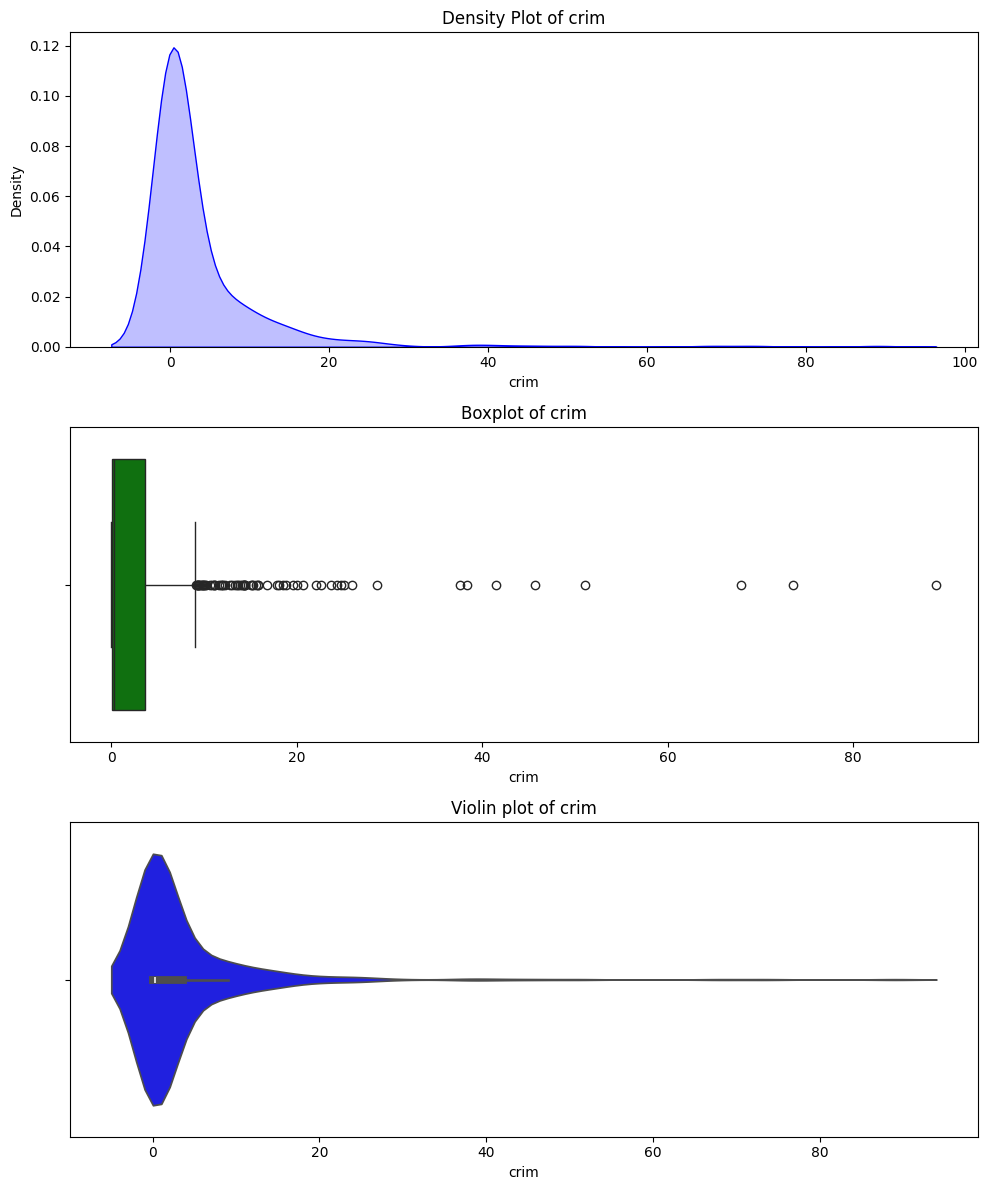

In [50]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df_boston = pd.read_csv("Boston.csv", index_col=0)  # Ensure the correct file path

# Define the Univariate Analysis Function
def univariate_analysis(data, column):
    print("-----------------------------------------")
    print(f"Univariate Analysis of Column: {column}")
    print("-----------------------------------------")

    # Descriptive statistics
    print("\nDescriptive Statistics:")
    print(data[column].describe())

    # Missing values
    missing_values = data[column].isnull().sum()
    print(f"\nMissing Values in Column '{column}': {missing_values}")

    # Skewness & Kurtosis
    skewness = data[column].skew()
    kurtosis = data[column].kurt()
    print(f"\nSkewness of '{column}': {skewness}")
    print(f"Kurtosis of '{column}': {kurtosis}")

    # Interquartile Range (IQR) for Outlier Detection
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    print("\nIQR Range & Outlier Bounds:")
    print(f"IQR: {IQR}, Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

    # Identifying outliers using IQR
    outliers_iqr = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    print(f"\nNumber of Outliers using IQR: {len(outliers_iqr)}")

    # Z-score based Outlier Detection
    z_scores = (data[column] - data[column].mean()) / data[column].std()
    outliers_zscore = data[np.abs(z_scores) > 3]  # Typically, z > 3 is an outlier
    print(f"Number of Outliers using Z-score: {len(outliers_zscore)}")

    # Visualizations
    plt.figure(figsize=(10, 12))

    # Density Plot
    plt.subplot(3, 1, 1)
    sns.kdeplot(data[column], fill=True, color="blue")
    plt.title(f"Density Plot of {column}")

    # Box Plot
    plt.subplot(3, 1, 2)
    sns.boxplot(x=data[column], color="green")
    plt.title(f"Boxplot of {column}")

    # Violin Plot
    plt.subplot(3, 1, 3)
    sns.violinplot(x=data[column], color="blue")
    plt.title(f"Violin plot of {column}")

    plt.tight_layout()
    plt.show()

# Example Usage
univariate_analysis(df_boston, "crim")  # Change "CRIM" to any column in your dataset
